# **Adaptabilidad a la educación en línea**
***
#### *Matias Ibarra - Bootcamp Data Science - The Bridge School - Año 2023*
***

<img src="../images/alumno.jpg" width ="800" height="400">

***
## Entrenamiento del modelo de evaluación:

In [183]:
# Importaciones necesarias:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [157]:
# Estilo de gráficos a utilizar:
plt.style.use('seaborn-v0_8-ticks')

***
### Carga de datos:

In [124]:
# Cargamos los datos de test y train

df_train  = pd.read_csv('../data/train/train.csv')
df_test  = pd.read_csv('../data/test/test.csv')

In [125]:
df_train

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Institution_Type_Government,Institution_Type_Non Government,Gender_Boy,Gender_Girl,Adaptivity Level
0,4,2,1,0,0,1,0,1,1,1,2,0,1,1,0,1
1,2,0,0,1,0,1,0,2,2,0,0,0,1,0,1,1
2,2,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0
3,2,0,0,1,0,1,1,2,0,0,0,0,1,1,0,0
4,4,2,1,1,0,1,1,1,2,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,3,1,0,1,1,1,1,2,2,0,0,0,1,0,1,1
899,4,2,1,1,0,2,1,2,2,0,2,0,1,0,1,2
900,2,0,0,1,1,0,1,2,1,0,0,0,1,1,0,0
901,4,2,0,1,0,1,0,2,0,0,0,0,1,1,0,0


In [126]:
df_test

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Institution_Type_Government,Institution_Type_Non Government,Gender_Boy,Gender_Girl,Adaptivity Level
0,2,0,0,1,0,1,1,2,1,0,2,0,1,0,1,1
1,3,1,0,1,0,1,1,2,1,0,0,0,1,1,0,1
2,3,1,1,1,0,1,1,2,1,1,1,1,0,1,0,1
3,4,2,0,1,0,1,1,1,1,1,0,0,1,0,1,2
4,4,2,1,0,0,1,0,1,1,1,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
298,0,0,0,1,0,1,1,2,1,0,0,0,1,1,0,0
299,4,2,1,1,0,1,1,2,1,1,0,0,1,1,0,1
300,4,2,1,1,1,0,1,2,1,1,2,0,1,1,0,2


***
### Conjunto de test y train

A los datasets de test y train debemos separarlos en X e y.

In [109]:
X_test = df_test.iloc[:, :-1]
y_test = df_test['Adaptivity Level']

# Vemos el recuento de cada categoria del target
# Hay pocos registros de la categoria 0 (high)
y_test.value_counts()

Adaptivity Level
2    144
1    127
0     31
Name: count, dtype: int64

In [110]:
X_train = df_train.iloc[:, :-1]
y_train = df_train['Adaptivity Level']

# Vemos el recuento de cada categoria del target
# Hay pocos registros de la categoria 0 (high)
y_train.value_counts()

Adaptivity Level
2    481
1    353
0     69
Name: count, dtype: int64

Los distintos valores del target estan desbalanceados, hay muchos valores 2 y 1 y muy pocos valores 0.

Aplicamos over-sampling sobre el conjunto de train (sobre el de test no).

In [127]:
# Mediante SMOTE vamos a oversamplear los datos

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# No hacer el test sobre el conjunto sampleado. Corregir esto
# X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)


In [128]:
y_train_resampled.value_counts()

Adaptivity Level
2    481
1    481
0    481
Name: count, dtype: int64

In [129]:
# y_test_resampled.value_counts()

Vemos graficamente como se distribuyen los valores antes y después del oversampler.

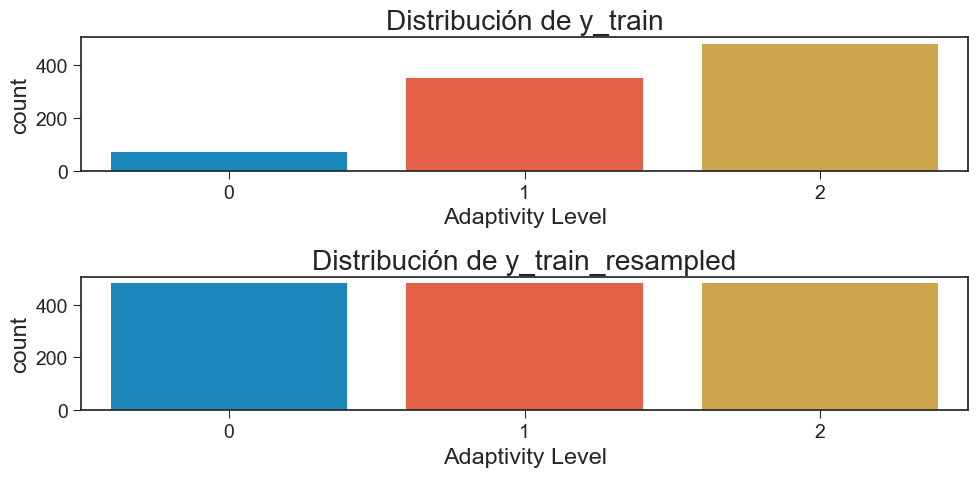

In [158]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
sns.countplot(x=y_train)
plt.title('Distribución de y_train')

plt.subplot(2, 1, 2)
sns.countplot(x=y_train_resampled)
plt.title('Distribución de y_train_resampled')

plt.tight_layout()
plt.show()


Un bosque aleatorio es un metaestimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza promedios para mejorar la precisión predictiva y controlar el sobreajuste.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [151]:
# Entrenamiento con RandomForestClassifier

parameters = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180],    # cantidad de árboles del bosque.
    'criterion': ['gini', 'entropy', 'log_loss'],                 # función para medir la calidad de la división.
    'max_leaf_nodes': [80,100,120,140,160,180,200,220],           # nodos máximos del modelo.
    'bootstrap': [True, False]                                    # si es falso, se utiliza todo el conjunto de datos para construir cada árbol.
}

modelo_rfc = RandomForestClassifier()

rfc = GridSearchCV(estimator = modelo_rfc ,
                  param_grid = parameters,
                  n_jobs = -1,                 # Número de trabajos que se ejecutarán en paralelo. -1 significa utilizar todos los procesadores
                  cv = 10,
                  scoring="accuracy")

rfc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_leaf_nodes': [80, 100, 120, 140, 160, 180, 200,
                                            220],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180]},
             scoring='accuracy')

In [152]:
print(rfc.best_estimator_)
print(rfc.best_params_)
print(rfc.best_score_)

RandomForestClassifier(criterion='log_loss', max_leaf_nodes=180)
{'bootstrap': True, 'criterion': 'log_loss', 'max_leaf_nodes': 180, 'n_estimators': 100}
0.915493295019157


In [153]:
final_rfc = rfc.best_estimator_
final_rfc.fit(X_train_resampled, y_train_resampled)
# y_pred = final_rfc.predict(X_test_resampled)
y_pred = final_rfc.predict(X_test)
# final_rfc.score(X_test_resampled,y_test_resampled)
final_rfc.score(X_test,y_test)

0.8741721854304636

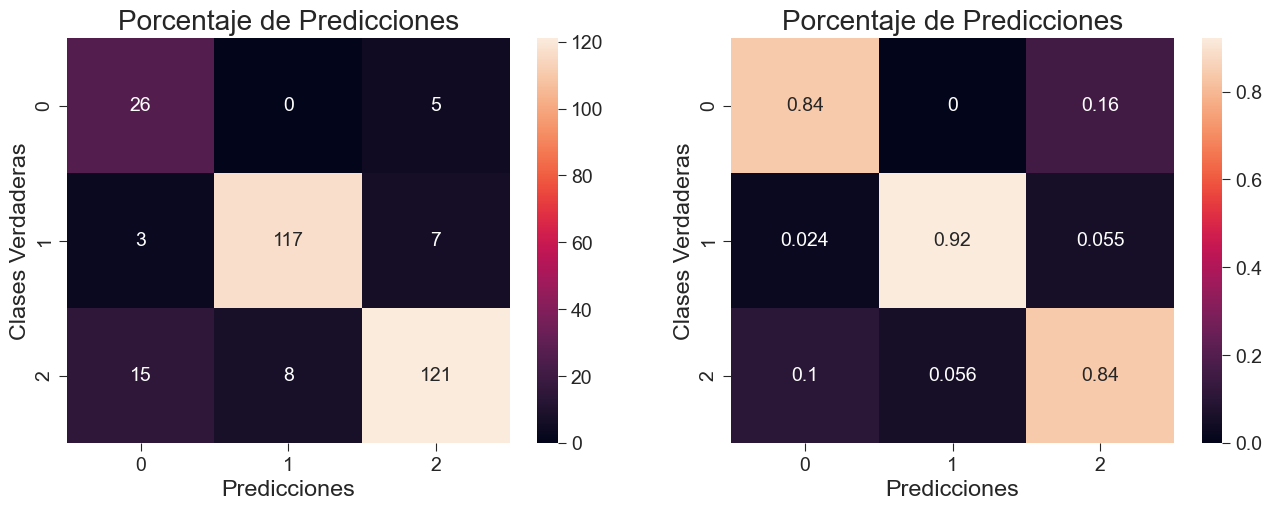

<Figure size 640x480 with 0 Axes>

In [180]:
# plt.figure(figsize=(8, 6))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", ax=axs[0])
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Clases Verdaderas')
axs[0].set_title('Porcentaje de Predicciones')
# plt.xlabel('Predicciones')
# plt.ylabel('Clases Verdaderas')
# plt.title('Porcentaje de Predicciones')
# plt.show()

# plt.subplot(1, 2, 2)
cm_2 = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_2, annot=True, ax=axs[1])
plt.xlabel('Predicciones')
plt.ylabel('Clases Verdaderas')
plt.title('Porcentaje de Predicciones')
plt.show()

plt.tight_layout()
plt.show();


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69        31
           1       0.94      0.92      0.93       127
           2       0.91      0.84      0.87       144

    accuracy                           0.87       302
   macro avg       0.81      0.87      0.83       302
weighted avg       0.89      0.87      0.88       302



In [156]:
import pickle

filename = 'trained_model_rfc'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_rfc, archivo_salida)

Este algoritmo construye un modelo aditivo en etapas avanzadas; permite la optimización de funciones de pérdida diferenciables arbitrarias.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [39]:
# Entrenamiento con GradientBoostingClassifier

parameters = {
    'loss': ['log_loss', 'deviance', 'exponential'],     # La función de pérdida que se va a optimizar.
    'learning_rate': [0.4,0.5,0.6,0.7,0.8],              # La tasa de aprendizaje reduce la contribución de cada árbol.
    'n_estimators': [140,160,180,200],                   # El número de etapas de impulso a realizar.
    'max_depth': [4,6,8,10]                              # Profundidad máxima de los estimadores de regresión individuales.
}
modelo_gbc = GradientBoostingClassifier()

gbc = GridSearchCV(estimator = modelo_gbc,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

gbc.fit(X_train_resampled, y_train_resampled)

c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1600 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
419 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.5, 0.6, 0.7, 0.8],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [140, 160, 180, 200]},
             scoring='accuracy')

In [41]:
print(gbc.best_estimator_)
print(gbc.best_params_)
print(gbc.best_score_)

GradientBoostingClassifier(learning_rate=0.7, max_depth=8, n_estimators=160)
{'learning_rate': 0.7, 'loss': 'log_loss', 'max_depth': 8, 'n_estimators': 160}
0.9155028735632182


In [81]:
final_gbc = gbc.best_estimator_
final_gbc.fit(X_train_resampled, y_train_resampled)
y_pred = final_gbc.predict(X_test_resampled)
final_gbc.score(X_test_resampled,y_test_resampled)

0.8541666666666666

<Axes: >

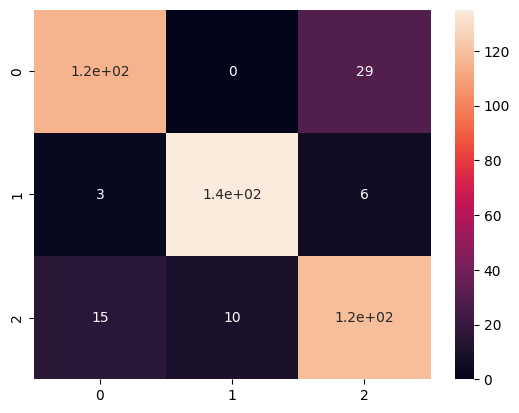

In [82]:
cm = confusion_matrix( y_test_resampled, y_pred)
sns.heatmap(cm, annot=True)

El objetivo del algoritmo SVM es encontrar un hiperplano que separe de la mejor forma posible dos clases diferentes de puntos de datos.

Fuente: https://es.mathworks.com/discovery/support-vector-machine.html

In [45]:
# Entrenamiento con SVC

parameters = {
    'C': [5,10,15,20],                                   # Parámetro de regularización.
    'degree': [1,2,3,4,5,6,7],                           # Grado de la función kernel polinomial.
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],      # Especifica el tipo de núcleo que se utilizará en el algoritmo.
    'gamma': ['scale', 'auto']                           # Coeficiente kernel.
}

modelo_svc = svm.SVC()

svc = GridSearchCV(estimator = modelo_svc ,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

svc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [5, 10, 15, 20], 'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [46]:
print(svc.best_estimator_)
print(svc.best_params_)
print(svc.best_score_)

SVC(C=15, degree=6, kernel='poly')
{'C': 15, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly'}
0.9120402298850575


In [79]:
final_svc = svc.best_estimator_
final_svc.fit(X_train_resampled, y_train_resampled)
y_pred = final_svc.predict(X_test_resampled)
final_svc.score(X_test_resampled,y_test_resampled)

0.8541666666666666

<Axes: >

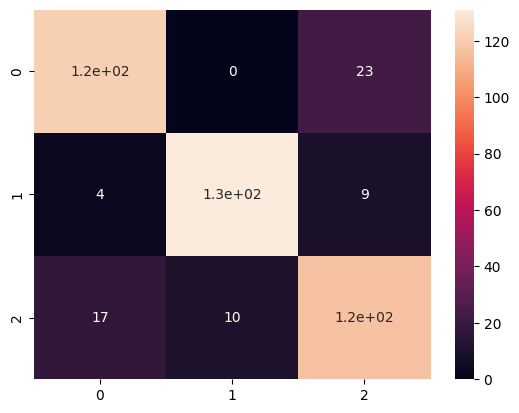

In [80]:
cm = confusion_matrix( y_test_resampled, y_pred)
sns.heatmap(cm, annot=True)

Un clasificador Bagging es un metaestimador conjunto que ajusta clasificadores base, cada uno de ellos en subconjuntos aleatorios del conjunto de datos original, y luego agrega sus predicciones individuales (ya sea mediante votación o promediando) para formar una predicción final.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [72]:
# Entreno con BagginClassifier

parameters = {
    'estimator': [svm.SVC(), DecisionTreeClassifier()],        # El estimador base para ajustarse a subconjuntos aleatorios del conjunto de datos.
    'n_estimators': [50,60,70,80,90,100],                      # El número de estimadores de base en el conjunto.   
    'max_samples': [400,440,480,520],                          # El número de muestras que se extraerán de X para entrenar cada estimador base.
    'bootstrap': [True,False],                                 # Si las muestras se extraen con reemplazo.
    'max_features': [8,9,10,11,12,13,14,15]                    # El número de características que se extraerán de X para entrenar cada estimador base 
}

modelo_bc = BaggingClassifier()

bc = GridSearchCV(estimator = modelo_bc ,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring = "accuracy")

bc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'estimator': [SVC(), DecisionTreeClassifier()],
                         'max_features': [8, 9, 10, 11, 12, 13, 14, 15],
                         'max_samples': [400, 440, 480, 520],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [71]:
print(bc.best_estimator_)
print(bc.best_params_)
print(bc.best_score_)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_features=12, max_samples=440, n_estimators=90)
{'bootstrap': False, 'estimator': DecisionTreeClassifier(), 'max_features': 12, 'max_samples': 440, 'n_estimators': 90}
0.8961159003831419


In [77]:
final_bc = bc.best_estimator_
final_bc.fit(X_train_resampled, y_train_resampled)
y_pred = final_bc.predict(X_test_resampled)
final_bc.score(X_test_resampled,y_test_resampled)

0.8634259259259259

<Axes: >

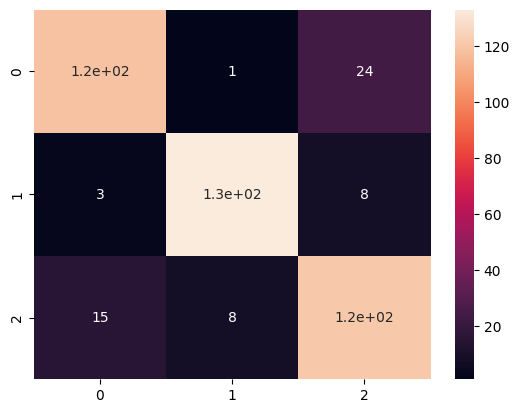

In [78]:
cm = confusion_matrix( y_test_resampled, y_pred)
sns.heatmap(cm, annot=True)

Un clasificador AdaBoost es un metaestimador que comienza ajustando un clasificador en el conjunto de datos original y luego ajusta copias adicionales del clasificador en el mismo conjunto de datos, pero donde los pesos de las instancias clasificadas incorrectamente se ajustan de modo que los clasificadores posteriores se centren más en casos difíciles.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [59]:
# Entreno con AdaBoostClassifier

parameters = {
    'estimator': [svm.SVC(), DecisionTreeClassifier()],     # El estimador base a partir del cual se construye el conjunto potenciado. 
    'n_estimators': [50,60,70,80,90,100],                   # El número máximo de estimadores en los que finaliza el impulso.
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6]              # Peso aplicado a cada clasificador en cada iteración de impulso.
}

modelo_abc = AdaBoostClassifier()

abc = GridSearchCV(estimator = modelo_abc ,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

abc.fit(X_train_resampled, y_train_resampled)

c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\matia\App

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'estimator': [SVC(), DecisionTreeClassifier()],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [60]:
print(abc.best_estimator_)
print(abc.best_params_)
print(abc.best_score_)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.2,
                   n_estimators=90)
{'estimator': DecisionTreeClassifier(), 'learning_rate': 0.2, 'n_estimators': 90}
0.9148084291187738


In [75]:
final_abc = abc.best_estimator_
final_abc.fit(X_train_resampled, y_train_resampled)
y_pred = final_abc.predict(X_test_resampled)
final_abc.score(X_test_resampled,y_test_resampled)

0.8726851851851852

<Axes: >

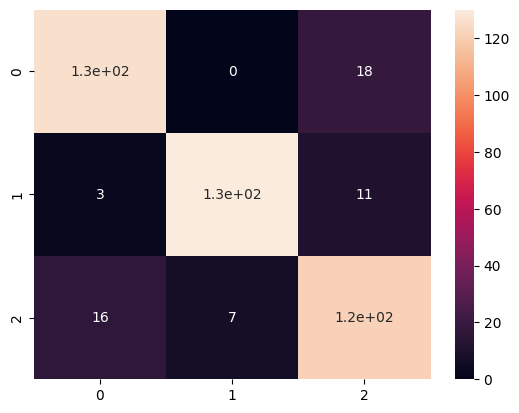

In [76]:
cm = confusion_matrix( y_test_resampled, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
# Buscamos el mejor modelo

pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

gbct = {
    'classifier': [GradientBoostingClassifier()],
    'classifier__n_estimators': [10,50,100,120]
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__max_features': [1,2,3]
}

svm_param = {
    'classifier': [svm.SVC()],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100]
}

bag_param = {
    'classifier': [BaggingClassifier()],
    'classifier__max_features': [1,2,3]
}

random_reg_params = {
    'classifier': [RandomForestRegressor()],
    'classifier__n_estimators': [10,50,100,120]
}


search_space = [
    gbct,
    random_forest_params,
    svm_param,
    bag_param,
    random_reg_params

]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 10)

clf.fit(X_train_resampled, y_train_resampled)

In [ ]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

In [ ]:
final_rfc = clf.best_estimator_
final_rfc.fit(X_train_resampled, y_train_resampled)
y_pred = final_rfc.predict(X_test_resampled)
final_rfc.score(X_test_resampled,y_test_resampled)

In [ ]:
cm = confusion_matrix( y_test_resampled, y_pred)
sns.heatmap(cm, annot=True)